In [134]:
# PART I: BIG PICTURE
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

np.random.seed(42) 


crashes1= pd.read_csv("va_crashes.csv")





#add an injuries column
def injury1(x):
    if x == 'K' or x =='A' or x == 'B' or x == 'C':
        return 1
    else:
        return 0
    
    
    
crashes1['injury'] = crashes1['Crash_Severity'].apply(injury1)


#print(crashes.loc[crashes['injury'] == 1, ['Crash_Severity']])

#Data Cleaning 
y= crashes1.injury
X_everything= crashes1.drop('injury', axis=1)




crashes = X_everything.drop(['OBJECTID','A_Crash','A_People','B_Crash','Driverinjurytype','Pdo_Crash','B_People','X', 'Y', 'Crash_Dsc', 'Crash_Dt','Crash_Military_Tm','C_Crash','C_People','Crash_Severity','District_C', 'Fatal_Crashes', 'Document_Nbr', 'Pedestrians_Killed','Juris_Code', 'Local_Case_Cd','Mpo_Name','Passage','Passgen','Pedgen','Passinjurytype','Rns_Mp','Pedage','Pedinjurytype','Rte_Nm','Vehiclenumber'], axis=1)

#X_train, X_test, y_train, y_test = train_test_split(crashes,y, test_size=int(len(crashes1)*0.20))

#Def drop columns that we do not want


#Features we want that are categorial variables 
coll_type = crashes[['Collision_Type']]
light_con = crashes[['Light_Condition']]
roadway = crashes[['Roadway_Surface_Cond']]
weather = crashes[['Weather_Condition']]
age = crashes[['Driverage']]
gender = crashes[['Drivergen']]
reason = crashes[['Driver_Action_Type_Cd']]
place = crashes[['Plan_Dist_Name']]
vehicle_type = crashes[['Vehicle_Body_Type_Cd']]
juris_name = crashes[['Juris_Name']]
responders = crashes[['Vsp_1']]



temp = crashes
temp = temp.drop('Collision_Type', axis=1)
temp = temp.drop('Light_Condition', axis=1)
temp = temp.drop('Roadway_Surface_Cond', axis=1)
temp = temp.drop('Driverage', axis=1)
temp = temp.drop('Drivergen', axis = 1)
temp = temp.drop('Driver_Action_Type_Cd', axis = 1)
temp = temp.drop('Plan_Dist_Name', axis = 1)
temp = temp.drop('Vehicle_Body_Type_Cd', axis = 1)
temp = temp.drop('Juris_Name', axis = 1)
temp = temp.drop('Vsp_1', axis = 1)
X = temp.drop('Weather_Condition', axis=1)



In [135]:
crashes.head()

,Collision_Type,Crash_Year,Driverage,Drivergen,Driver_Action_Type_Cd,Gps_Latitude_Nbr,Gps_Longitude_Nbr,Juris_Name,Light_Condition,Plan_Dist_Name,Roadway_Surface_Cond,Vehicle_Body_Type_Cd,Vsp_1,Weather_Condition
0,1. Rear End,2016,"18,19","Male,Male","12. Following Too Close,1. No Improper Action",-79.060080,37.392420,Campbell,5. Darkness - Road Not Lighted,Region 2000,2. Wet,"2. Truck - Pick-up/Passenger Truck,1. Passenge...",3,4. Mist
1,2. Angle,2017,"32,51,33","Female,Male,Male","11. Did Not Have Right-of-Way,1. No Improper A...",-76.159620,36.837310,Virginia Beach,4. Darkness - Road Lighted,Hampton Roads,2. Wet,"1. Passenger car,1. Passenger car,1. Passenger...",5,4. Mist
2,9. Fixed Object - Off Road,2013,16,Male,23. Driver Distraction,-77.387501,38.982137,Herndon,2. Daylight,Northern Virginia,1. Dry,22. Truck - Sport Utility Vehicle (SUV),7,1. No Adverse Condition (Clear/Cloudy)
3,9. Fixed Object - Off Road,2017,49,Male,9. Other Improper Passing,-77.757740,37.692890,Goochland,2. Daylight,Richmond Regional,1. Dry,1. Passenger car,1,1. No Adverse Condition (Clear/Cloudy)
4,1. Rear End,2014,"18,21","Male,Female","12. Following Too Close,1. No Improper Action",-76.194990,36.814570,Virginia Beach,2. Daylight,Hampton Roads,1. Dry,"1. Passenger car,1. Passenger car",5,1. No Adverse Condition (Clear/Cloudy)


In [136]:
np.sum(crashes.isnull())


Collision_Type             0
Crash_Year                 0
Driverage                183
Drivergen                  0
Driver_Action_Type_Cd      0
Gps_Latitude_Nbr           6
Gps_Longitude_Nbr          6
Juris_Name                 0
Light_Condition            0
Plan_Dist_Name             0
Roadway_Surface_Cond       0
Vehicle_Body_Type_Cd       0
Vsp_1                      0
Weather_Condition          0
dtype: int64

In [137]:
##Applying the pipelienes on the data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder



#regular pipeline for quantative data 
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])




coll_name =['Collision_Type']
light_name = ['Light_Condition']
roadway_name = ['Roadway_Surface_Cond']
weather_name = ['Weather_Condition']
#age_name = ['Driverage']
gender_name = ['Drivergen']
reason_name = ['Driver_Action_Type_Cd']
place_name = ['Plan_Dist_Name']
veh_type = ['Vehicle_Body_Type_Cd']
j_name = ['Juris_Name']
vsp = ['Vsp_1']


num_attribs = list(X) #list of numerical only values which is crash
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('collision', OneHotEncoder(), coll_name),
    ('light', OneHotEncoder(), light_name),
    ('roadway_condition', OneHotEncoder(), roadway_name),
    ('weather', OneHotEncoder(), weather_name),
    #('driver_age', OneHotEncoder(), age_name), #had NaN values so idk how to hot encode and deal with that
    ('driver_gender', OneHotEncoder(), gender_name),
    ('reason', OneHotEncoder(), reason_name),
    ('location', OneHotEncoder(), place_name),
    ('vehicle_type', OneHotEncoder(), veh_type),
    ('jurisdiction_name', OneHotEncoder(), j_name),
    ('vsp', OneHotEncoder(), vsp),
    
    
])




crashes_prepared = full_pipeline.fit_transform(crashes)
crashes_prepared.shape

X_train, X_test, y_train, y_test = train_test_split(crashes_prepared,y, test_size=int(len(crashes1)*0.20))

#X_train = full_pipeline.fit_transform(X_train) #cleaned scaled data
#X_test = test_full_pipeline.fit_transform(X_test)

/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify 

In [141]:
#Linear Regression

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


crash_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, crash_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE" , lin_rmse)


#This is not a bad indicator because typical injury results range from 0 to 1, there being a fatal injury, to there being no fatal injury,
#so a 0.43 means that a 




from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
crash_predictions2 = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, crash_predictions2)
tree_rmse = np.sqrt(tree_mse)
print('tree' , tree_rmse) #Since we got 0 this means the model has badly overfit the data



from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train) 
crash_predictions3 = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, crash_predictions3)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE' , forest_rmse)




Linear Regression RMSE 0.4122836666564108
tree 0.0


/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest RMSE 0.2035173769218819


In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)
print(X_train)
print('here')
print(X_test)



/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


  (0, 0)	-0.899995284112756
  (0, 1)	0.5780972768609143
  (0, 2)	0.5296944766128389
  (0, 17)	1.0
  (0, 19)	1.0
  (0, 28)	1.0
  (0, 41)	1.0
  (0, 45)	1.0
  (0, 457)	1.0
  (0, 564)	1.0
  (0, 574)	1.0
  (0, 1179)	1.0
  (0, 1187)	1.0
  (1, 0)	-0.899995284112756
  (1, 1)	-1.5021842107012193
  (1, 2)	-0.5677787793359059
  (1, 3)	1.0
  (1, 19)	1.0
  (1, 25)	1.0
  (1, 36)	1.0
  (1, 46)	1.0
  (1, 234)	1.0
  (1, 570)	1.0
  (1, 575)	1.0
  (1, 1137)	1.0
  :	:
  (8030, 1)	0.445944718462234
  (8030, 2)	-0.3155263173841328
  (8030, 10)	1.0
  (8030, 22)	1.0
  (8030, 25)	1.0
  (8030, 36)	1.0
  (8030, 59)	1.0
  (8030, 458)	1.0
  (8030, 569)	1.0
  (8030, 630)	1.0
  (8030, 1105)	1.0
  (8030, 1187)	1.0
  (8031, 0)	-0.3071829583330623
  (8031, 1)	0.33120581508822394
  (8031, 2)	-0.3009288035249251
  (8031, 3)	1.0
  (8031, 19)	1.0
  (8031, 25)	1.0
  (8031, 36)	1.0
  (8031, 59)	1.0
  (8031, 234)	1.0
  (8031, 569)	1.0
  (8031, 775)	1.0
  (8031, 1064)	1.0
  (8031, 1187)	1.0
here
  (0, 0)	0.2856293674466313
  (

In [99]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)

#y_train_1 = (y_train == 1)

svm_clf.fit(X_train, y_train)
#do fitting on training values 



# Testing your svm here
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve


y_pred = svm_clf.predict(X_test) #predicted y scores 
#predict on test values 

accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ", accuracy) # 0.0.9141304347826087

precision_s = precision_score(y_test,y_pred) #how accurate your guesses from x_test are from model for actual y_test values
print("precision: ", precision_s) #0.9405099150141643

recall_s = recall_score(y_test,y_pred) 
print("recall score:" , recall_s) #0.8512820512820513


f1 = f1_score(y_test,y_pred)
print("f1_score:", f1)  #0.8936742934051144



'''
accuracy:  0.6661684105630294
precision:  0.6241610738255033
recall score: 0.13154172560113153
f1_score: 0.21728971962616822

'''





accuracy:  0.6880916791230692
precision:  0.6505576208178439
recall score: 0.24752475247524752
f1_score: 0.35860655737704916


/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


'\naccuracy:  0.6661684105630294\nprecision:  0.6241610738255033\nrecall score: 0.13154172560113153\nf1_score: 0.21728971962616822\n\n'

[]

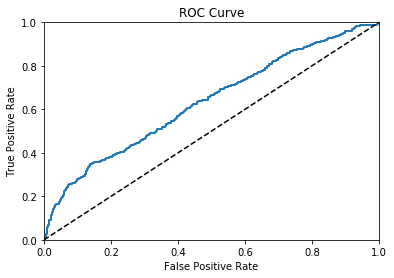

In [100]:
#roc  curve 

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

scores = svm_clf.decision_function(X_test) #conversts X-test values to percentage values 
fpr, tpr, thresholds = roc_curve(y_test, scores)


#function that plots roc curve 
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
plot_roc_curve(fpr, tpr)
plt.plot()

In [101]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, scores)

0.6331607006854533

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()



for clf in (log_clf, rnd_clf, svm_clf):
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LogisticRegression 0.6965620328849028
RandomForestClassifier 0.6696562032884903


/Users/Kajal217/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.6477329347284504


In [156]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=2,random_state=0).fit(X_train)
kmeans
X_train

<8032x1194 sparse matrix of type '<class 'numpy.float64'>'
	with 104416 stored elements in Compressed Sparse Row format>

In [160]:
import numpy as np
correct = 0
for i in range(X_train.shape[0]):
    predict_me = np.array(X_train.shape[i])
    print(predict_me)
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] ==y_train[i]:
        correct+=1
print(correct/len(X_train))

8032


TypeError: len() of unsized object